In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Logos

In [2]:
lagos = pd.read_csv('lagos_rooftop_solar_potential.csv')

In [3]:
lagos.head(3)

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,2c2e6093-4675-4342-8141-78b7da7319f0,Lagos,174.40,103.42,20.06,26229.95,single family residential,13.33,5.05,1307.39,NaN,NaN
1,94e9aea9-4208-4a77-8578-100648bbca1a,Lagos,627.00,463.14,89.85,118061.12,multi-family residential,6.34,5.74,1314.00,NaN,NaN
2,91841e20-5844-4aa5-9ba8-7c27b174ab4e,Lagos,418.81,309.52,60.05,78901.84,multi-family residential,8.41,8.75,1314.00,NaN,NaN


In [4]:
lagos.columns

Index(['uuid', 'City', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor', 'Unit_installation_price', 'Comment'],
      dtype='object')

common_columns = [
    "City",
    "Surface_area",
    "Potential_installable_area",
    "Peak_installable_capacity",
    "Energy_potential_per_year",
    "Assumed_building_type",
    "Estimated_tilt",
    "Estimated_building_height",
    "Estimated_capacity_factor"
]

Consider only common columns

In [7]:
lagos = lagos[['City','Surface_area','Potential_installable_area','Peak_installable_capacity','Energy_potential_per_year','Assumed_building_type','Estimated_tilt','Estimated_building_height','Estimated_capacity_factor']]

In [8]:
lagos.columns

Index(['City', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor'],
      dtype='object')

In [9]:
lagos.head(1)

,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,Lagos,174.4,103.42,20.06,26229.95,single family residential,13.33,5.05,1307.39


In [10]:
lagos['City'].value_counts()

City
Lagos    212532
Name: count, dtype: int64

In [11]:
lagos.shape

(212532, 9)

In [12]:
lagos.dtypes

City                           object
Surface_area                  float64
Potential_installable_area    float64
Peak_installable_capacity     float64
Energy_potential_per_year     float64
Assumed_building_type          object
Estimated_tilt                float64
Estimated_building_height     float64
Estimated_capacity_factor     float64
dtype: object

In [13]:
num_col = lagos.select_dtypes(include=['int64', 'float64'])

cat_col = lagos.select_dtypes(exclude=['int64', 'float64'])

num_col.columns, cat_col.columns

(Index(['Surface_area', 'Potential_installable_area',
        'Peak_installable_capacity', 'Energy_potential_per_year',
        'Estimated_tilt', 'Estimated_building_height',
        'Estimated_capacity_factor'],
       dtype='object'),
 Index(['City', 'Assumed_building_type'], dtype='object'))

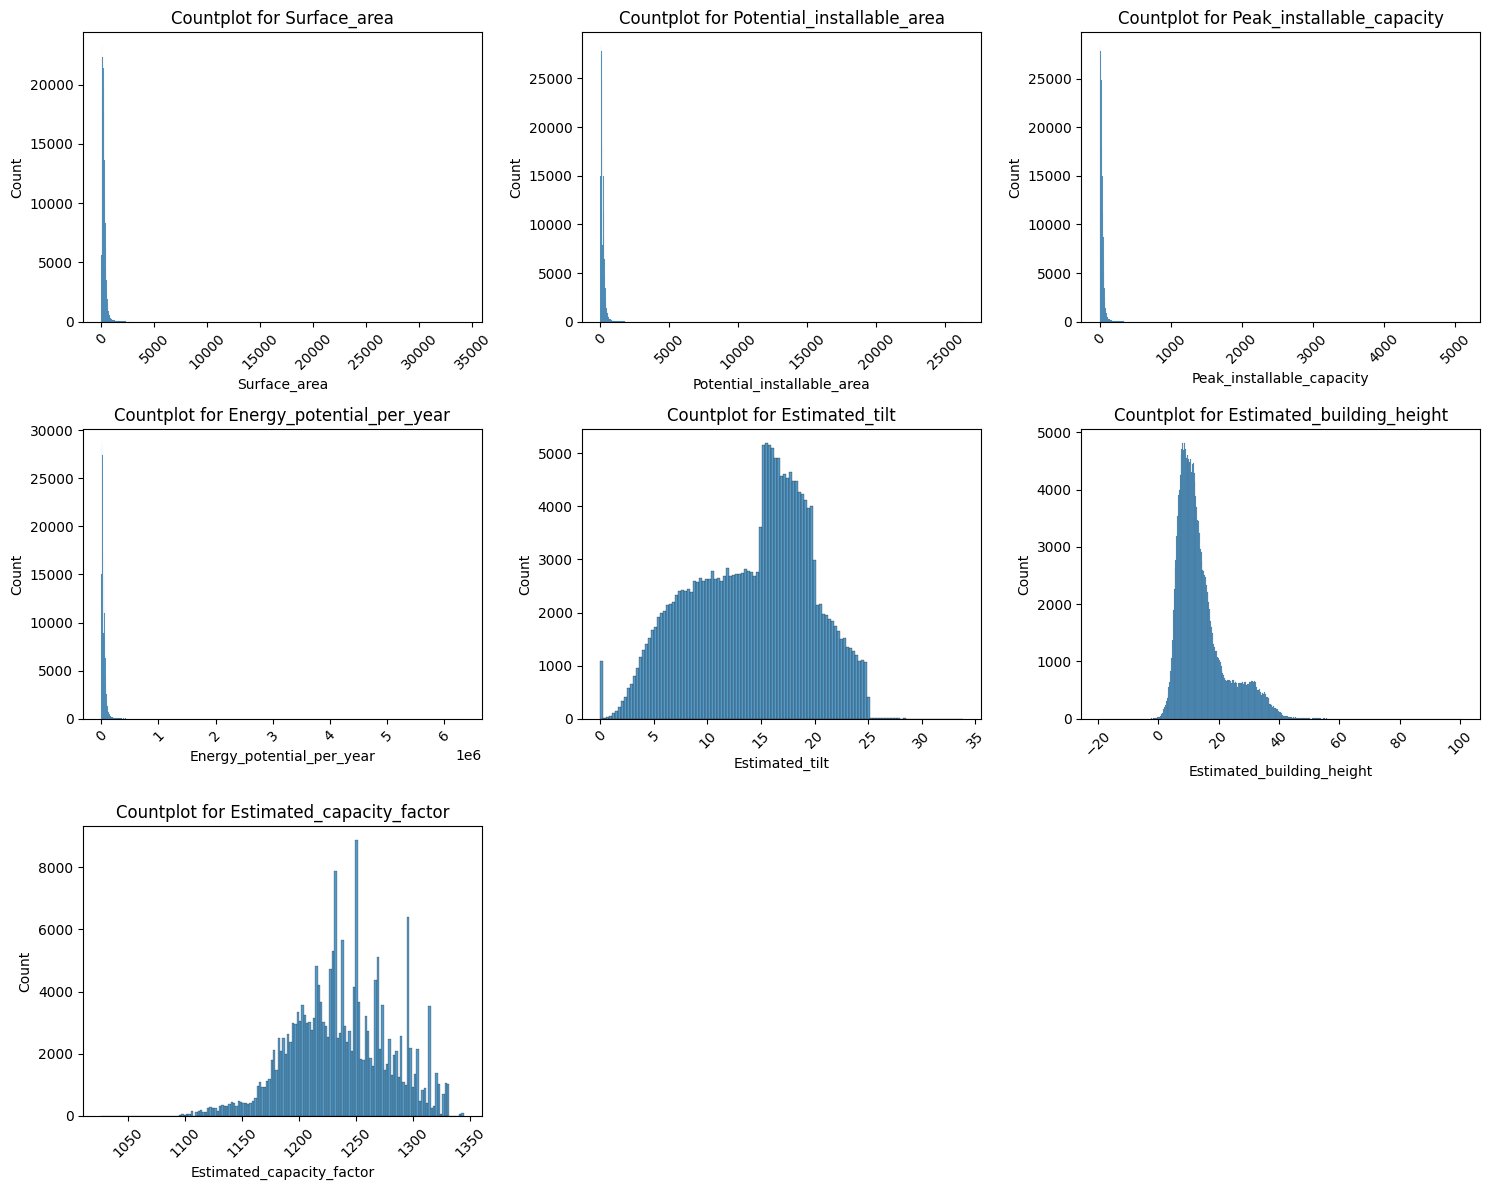

In [ ]:
num_cols = len(num_col.columns)

# Set up the subplot grid dimensions
rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Customize the size as needed
axes = axes.flatten()  # Flatten to iterate over axes easily

# Iterate through the categorical columns and plot countplots
for i, col in enumerate(num_col.columns):
    sns.histplot(x=lagos[col], ax=axes[i])
    axes[i].set_title(f'Countplot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

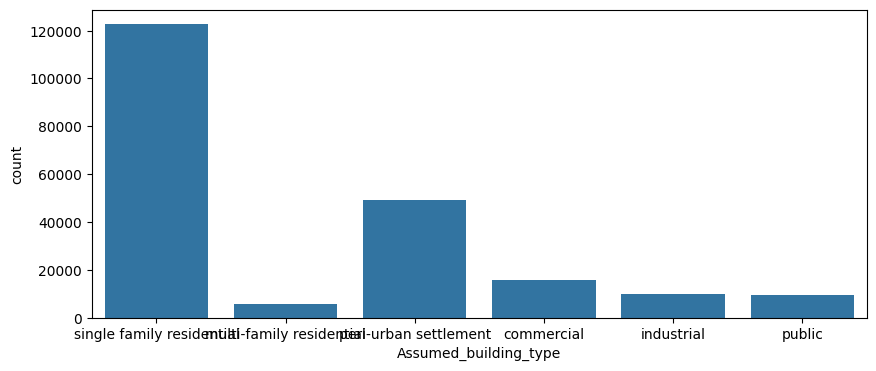

In [15]:
plt.figure(figsize=(10, 4))
sns.countplot(data=lagos, x='Assumed_building_type')
plt.show()

BoxPlot

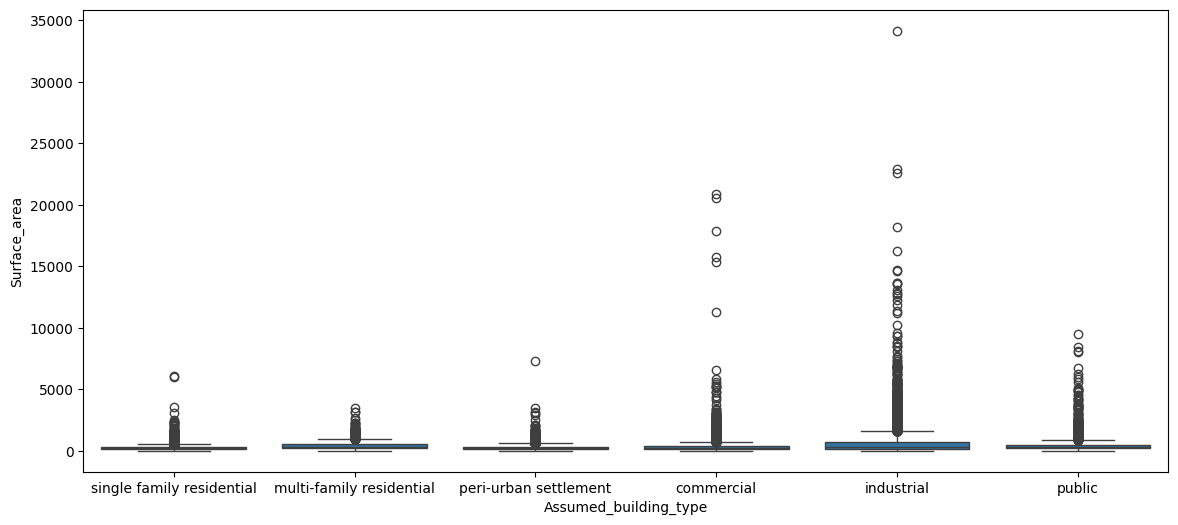

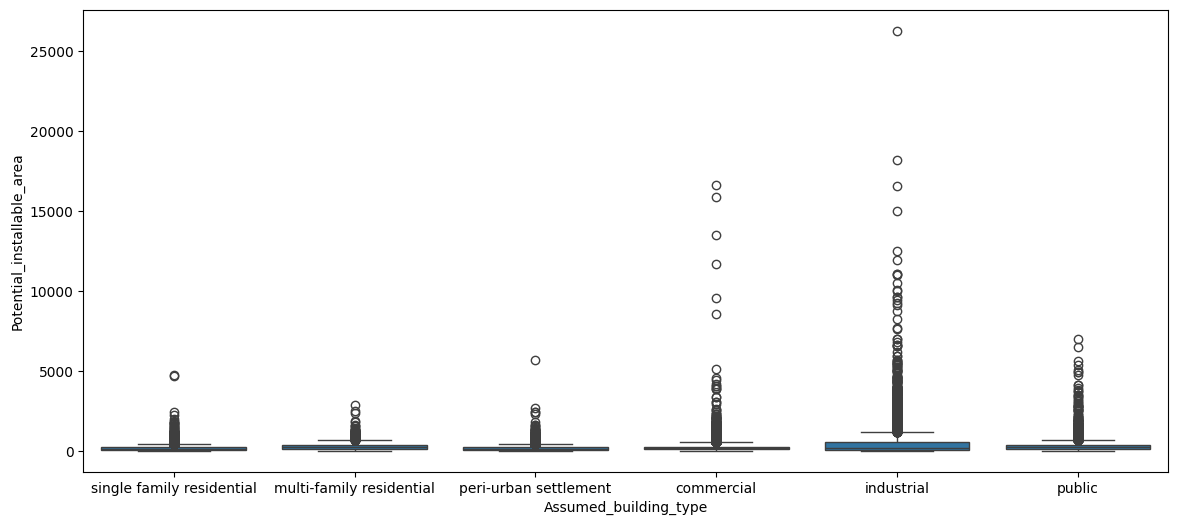

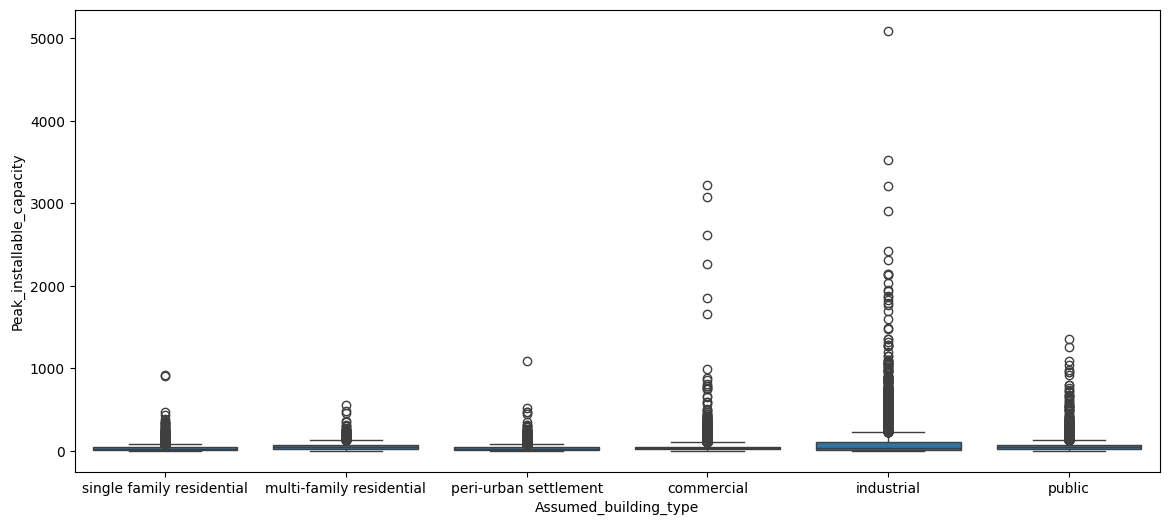

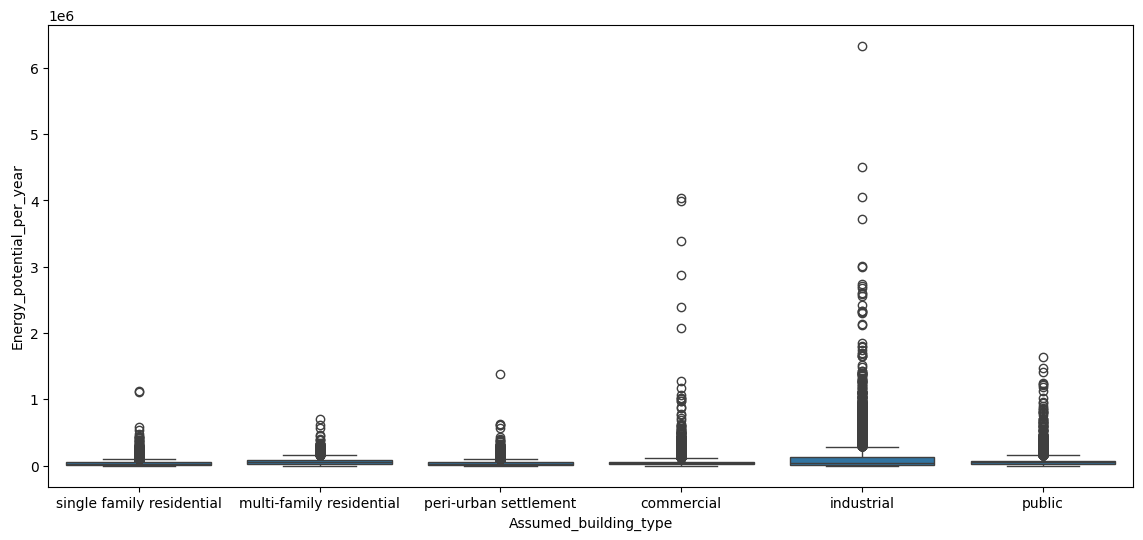

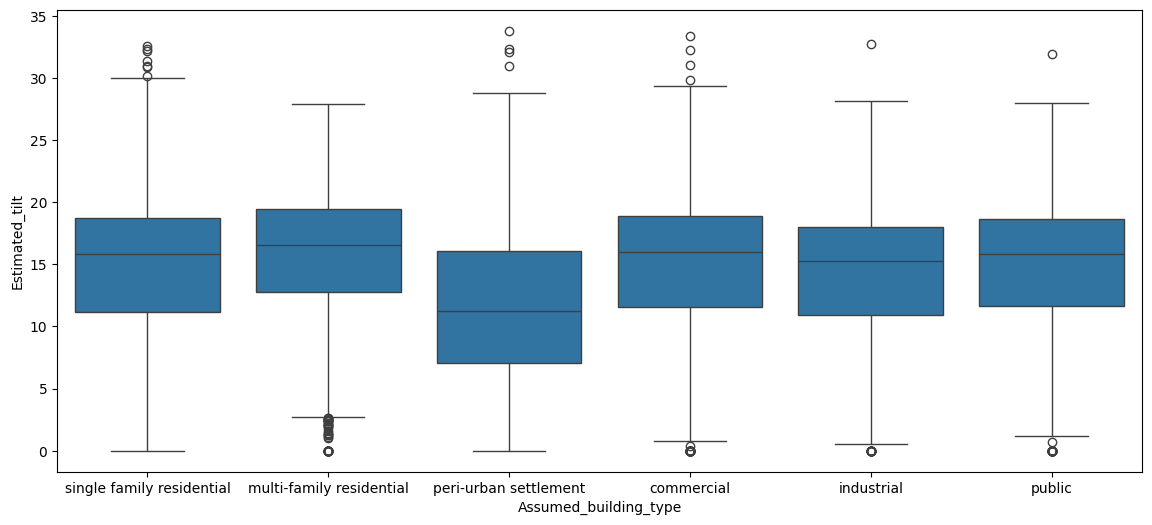

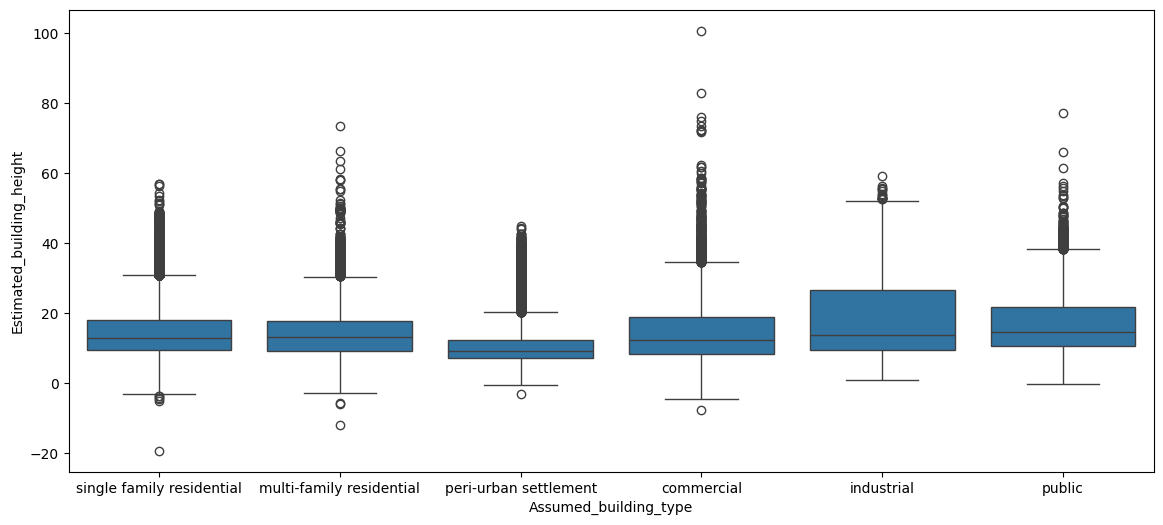

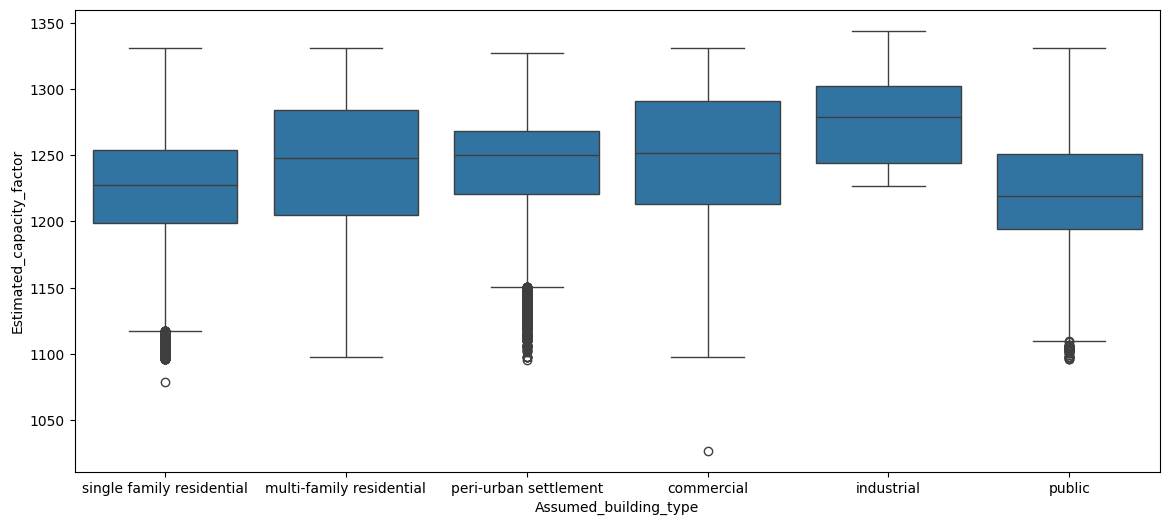

In [23]:
for i in num_col:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x = lagos['Assumed_building_type'], y = lagos[i])
    plt.show()

Drop City for EDA

In [31]:
lagos.drop(columns='City',axis=1,inplace=True)

C:\Users\supip\AppData\Local\Temp\ipykernel_31520\723398841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagos.drop(columns='City',axis=1,inplace=True)


In [32]:
lagos.head(1)

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,174.4,103.42,20.06,26229.95,single family residential,13.33,5.05,1307.39


In [33]:
def outlier_count(col, data = num_col):

    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [35]:
for col in num_col.columns:
    outlier_count(col)


---------------Surface_area---------------

Number of outliers: 9044
Percent of data that is outlier: 4.26%

---------------Potential_installable_area---------------

Number of outliers: 8499
Percent of data that is outlier: 4.0%

---------------Peak_installable_capacity---------------

Number of outliers: 8494
Percent of data that is outlier: 4.0%

---------------Energy_potential_per_year---------------

Number of outliers: 8780
Percent of data that is outlier: 4.13%

---------------Estimated_tilt---------------

Number of outliers: 15
Percent of data that is outlier: 0.01%


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lagos['Assumed_building_type'] = le.fit_transform(lagos['Assumed_building_type'])


In [39]:
lagos['Assumed_building_type'].unique()

array([5, 2, 3, 0, 1, 4])

In [42]:
le.classes_

array(['commercial', 'industrial', 'multi-family residential',
       'peri-urban settlement', 'public', 'single family residential'],
      dtype=object)

In [40]:
lagos.head(3)

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,
0,174.40,103.42,20.06,26229.95,5,13.33,5.05,1307.39,5
1,627.00,463.14,89.85,118061.12,2,6.34,5.74,1314.00,2
2,418.81,309.52,60.05,78901.84,2,8.41,8.75,1314.00,2


<Axes: >

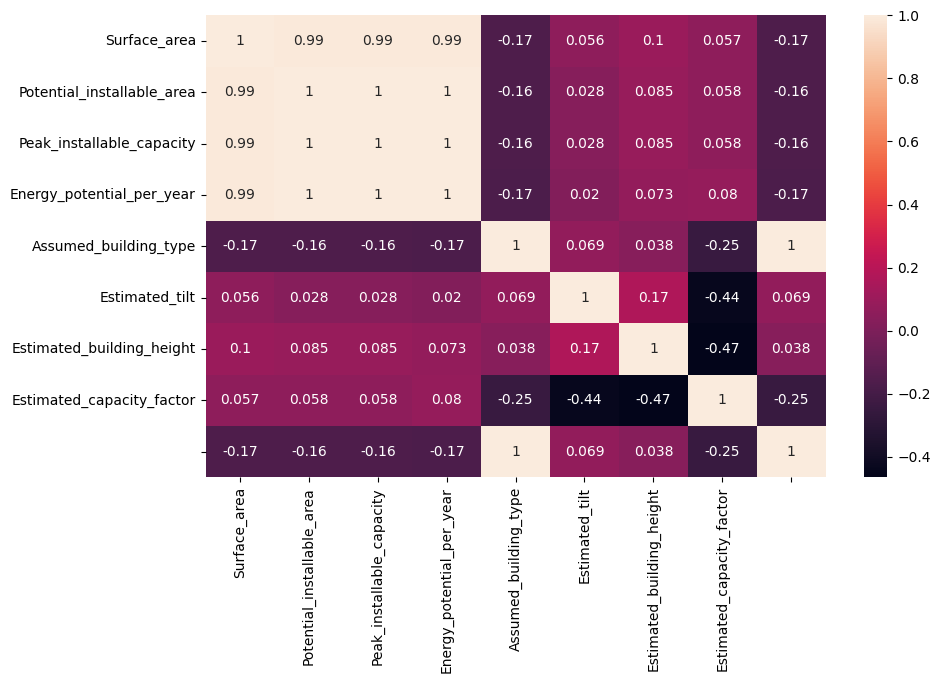

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(lagos.corr(), annot=True)